<a href="https://colab.research.google.com/github/JasmineNag/Appliance-Energy-Prediction/blob/main/Copy_of_ML_Appliances_Energy_Prediction_Project_ipynb_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**  - Appliances Energy Prediction 



##### **Project Type**    -Regression
##### **Contribution**    - Individual


# **Project Summary -**

The purpose of this project is to forecast the electricity consumption of a particular household in Belgium based on the temperature and humidity levels of various rooms in the facility and surrounding weather information over 4.5 months. The data set runs 4.5 months at 10 minutes. A ZigBee wireless sensor network is being used to monitor the home’s temperature and humidity levels. Around 3.3 minutes, each wireless node sent the temperature and humidity data. The wireless data was then averaged across intervals of 10 minutes. Every 10 minutes, m-bus energy meters collected the energy data. The experimental data sets were combined with the weather data from the closest airport weather station (Chievres Airport, Belgium), which was extracted from a public data set from Reliable Prognosis (rp5.ru). The data set has two random variables to test the regression models and exclude non-predictive characteristics (parameters).

In this project, we have examined various concrete formulations with different Appliancess. We developed a graphs/charts that aligns to the available information. Utilizing model as a framework, we developed a fresh formulation and, being used to predicted the Appliances.

In histogram charts, 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.

The Insights from bar chart analysis for weedays ,the consumption is higher on weekends , ie week number 0, 6, 5

For hour analysis ,the consumption is high in the evening time , ie hour between 16 and 20

For ML analysis , I use the linear regression ,ridge regression for analysis part.

# **GitHub Link -**

https://github.com/JasmineNag/Appliance-Energy-Prediction.git

# **Problem Statement**


To predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure .

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [95]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mno
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
%matplotlib inline
import matplotlib.pyplot as plt






### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path=('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT2/Appliance Energy Prediction/data_application_energy.csv')

In [4]:
energy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CAPSTONE PROJECT2/Appliance Energy Prediction/data_application_energy.csv')

### Dataset First View

In [5]:
# Dataset First Look
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
energy.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
energy.shape

(19735, 29)

### Dataset Information

In [8]:
# Dataset Info
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(energy[energy.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
print(energy.isnull().sum())


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


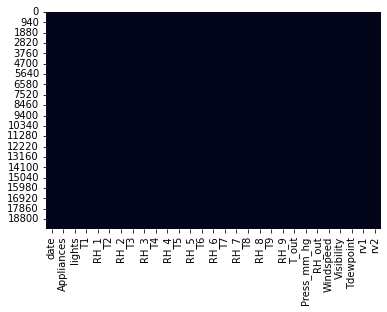

In [11]:
# Visualizing the missing values
sns.heatmap(energy.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Appliance Energy, and we have to predict the energy consumption of appliances and the insights behind it.

Appliance Energy prediction is analytical studies on the energy consume by a customer in a period of time . The goal is to understand the usage of energy consumption  

The above dataset has 19735 rows and 29columns. There are no mising values and duplicate values in the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [13]:
# Dataset Describe
energy.describe(include='all')

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-01-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


### Variables Description 

Date: time (yr:mon:day:hr:min:sec) 

Appliances: energy use in Wh 

lights: Energy use of light fixtures in the house(Wh)

T1: Temperature in kitchen area(C) 

RH_1: Humidity in kitchen area(%)

T2: Temperature in living room area(C)

 RH_2: Humidity in living room(%)

T3: Temperature in laundry room

 RH_3: Humidity in laundry room area(%)

T4: Temperature in office room(C) 

RH_4: Humidity in office room(%)

T5: Temperature in bathroom in (C)

 RH_5: Humidity in bathroom(%)

T6: Temperature outside the building (north side) in (C)
 
 RH_6: Humidity outside the building (northside)%

T7: Temperature in ironing room in (C) 

RH_7: Humidity in ironing room in (%)

T8:Temperature in teenager room 2 in (C)

 RH_8: Humidity in teenager room 2 in (%)

T9: Temperature in parents room in (C)

 RH_9: Humidity in parents room in %

To: Temperature outside (from Chievres weather station) in (C)

 Pressure (from Chievres weather station): in mm Hg 

RH_out: Humidity outside (from Chievres weather station) in (%) 

Wind speed (from Chievres weather station): in(m/s) 

Visibility (from Chievres weather station): Ordinal data

 Tdewpoint (from Chievres weather station): Cat data

 rv1: Random variable 1(nondimensional) 
 
 rav2: Random variable 2(nondimensional)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
energy.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=energy.copy()

# Checking Shape of True Value
print("No. of Appliances : -",len(df[df['Appliances']==True]))
# Assigning Appliances data to variable df_Appliances
df_Appliances=df[(df['Appliances']==True)]


No. of Appliances : - 0


In [16]:
# T1 data groupby RH_1 Wise
pd.DataFrame(df.groupby('T1')['RH_1'].value_counts().reset_index(name="Count"))

,T1,RH_1,Count
0,16.79,45.290000,2
1,16.79,45.700000,2
2,16.79,45.090000,1
3,16.79,45.163333,1
4,16.79,45.266667,1
...,...,...,...
14099,26.20,43.526667,1
14100,26.20,44.196667,1
14101,26.26,41.623333,1
14102,26.26,43.660000,1


In [17]:
# Function to get all area code mean & median while passing area code and dataframe.
def get_mean_median(df,Appliances):
  '''
  This function returns the mean and median of the whole dataset for a particular area code.

  '''
  try:
    return pd.concat([df[(df['Appliances']==Appliances)].describe().iloc[1],
            df[(df['Appliances']==Appliances)].describe().iloc[5]],
            axis=1).rename(columns={"50%":"median"}).fillna("-")
  except:
    print("Invalid Area Code")

In [18]:
# Getting Mean Median for Appliances 270
get_mean_median(df=df,Appliances=270)

,mean,median
Appliances,270.000000,270.000000
lights,6.206897,0.000000
T1,22.041891,22.000000
RH_1,41.450061,41.693333
T2,21.287592,20.790000
RH_2,40.005229,39.633333
T3,23.441080,23.116667
RH_3,40.316257,39.733333
T4,21.228580,21.100000
RH_4,39.618011,39.933333


In [19]:
# Getting Mean Median for Appliances 430
get_mean_median(df=df,Appliances=430)

,mean,median
Appliances,430.000000,430.000000
lights,10.800000,10.000000
T1,21.671600,21.430000
RH_1,40.821333,40.766667
T2,20.613878,20.100000
RH_2,39.326417,38.633333
T3,21.945600,21.890000
RH_3,39.092000,38.163333
T4,20.271933,19.890000
RH_4,39.567495,38.900000


In [20]:
# Getting Unique States
print(df['date'].unique())
print(" ")
# Getting Unique States Count
print("Unique Dates Count is ",df['date'].nunique(),".")

['2016-01-11 17:00:00' '2016-01-11 17:10:00' '2016-01-11 17:20:00' ...
 '2016-05-27 17:40:00' '2016-05-27 17:50:00' '2016-05-27 18:00:00']
 
Unique Dates Count is  19735 .


In [21]:
# Appliances Counts grouby Date wise
pd.DataFrame(df.groupby('date')['Appliances'].value_counts(  ).reset_index(name="Count"))

,date,Appliances,Count
0,2016-01-11 17:00:00,60,1
1,2016-01-11 17:10:00,60,1
2,2016-01-11 17:20:00,50,1
3,2016-01-11 17:30:00,50,1
4,2016-01-11 17:40:00,60,1
...,...,...,...
19730,2016-05-27 17:20:00,100,1
19731,2016-05-27 17:30:00,90,1
19732,2016-05-27 17:40:00,270,1
19733,2016-05-27 17:50:00,420,1


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 BOX PLOT

In [22]:
# Chart - 1 BOX Plot for each Numerical features

In [23]:
numeric_features=energy.describe().columns
numeric_features

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

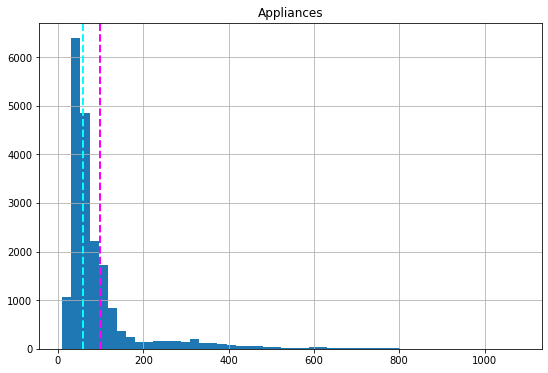

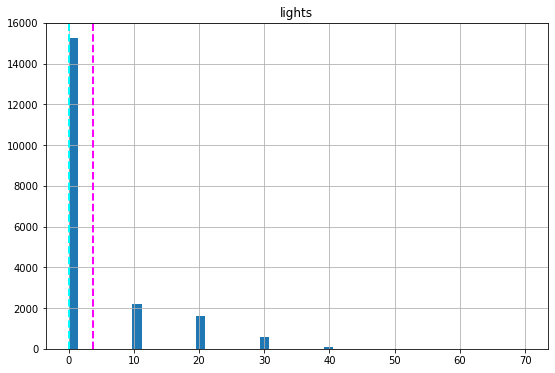

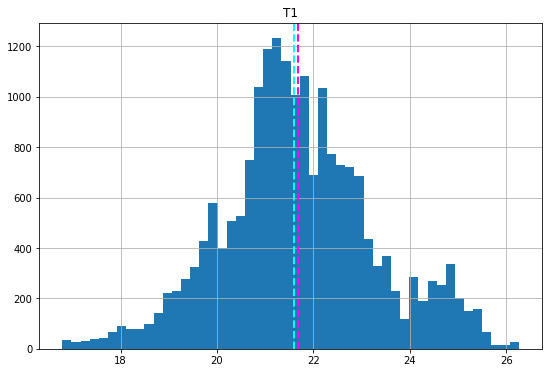

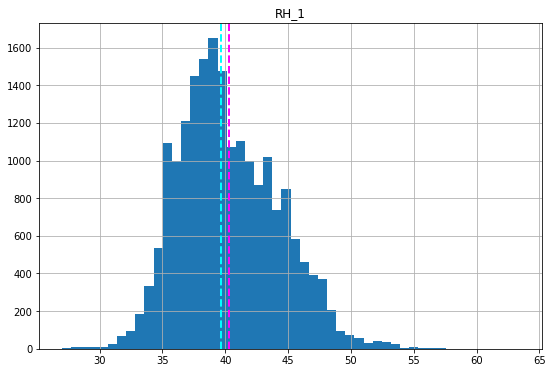

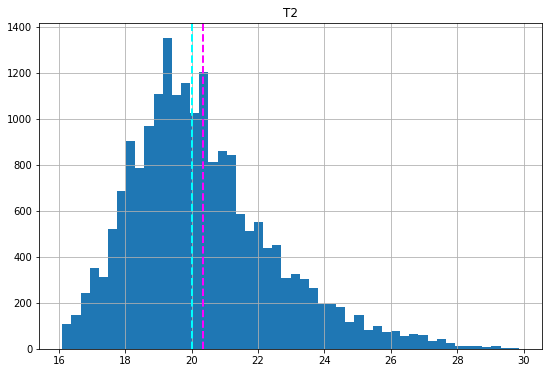

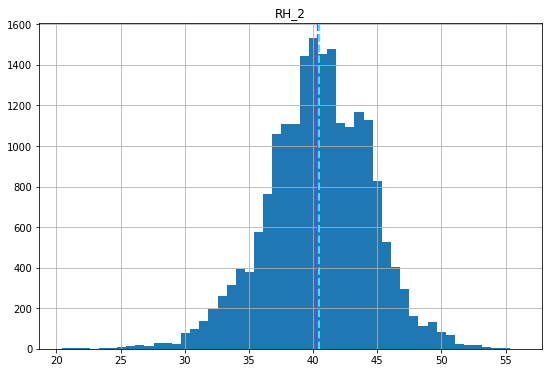

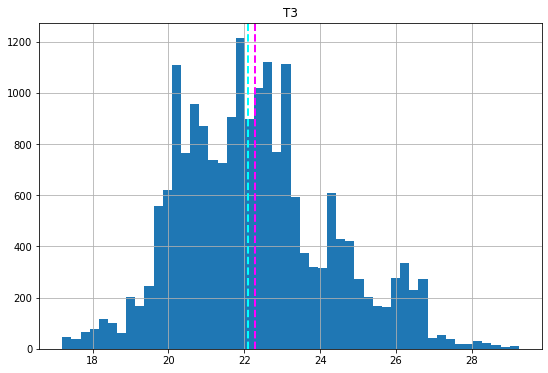

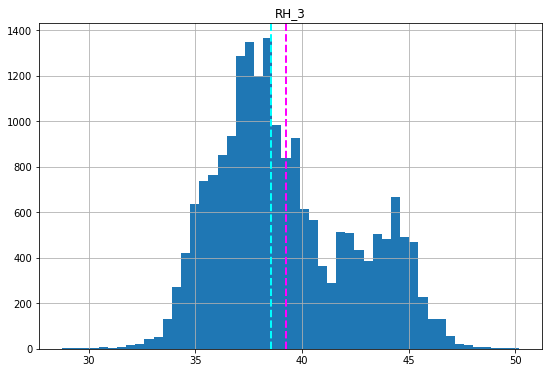

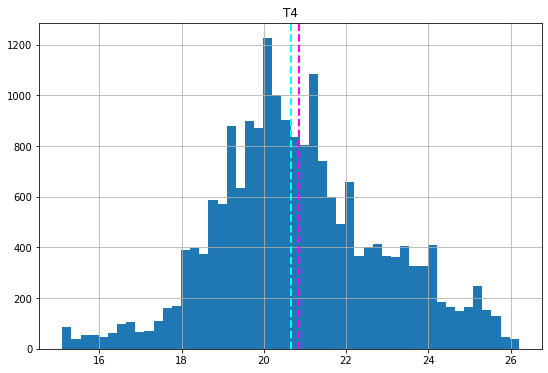

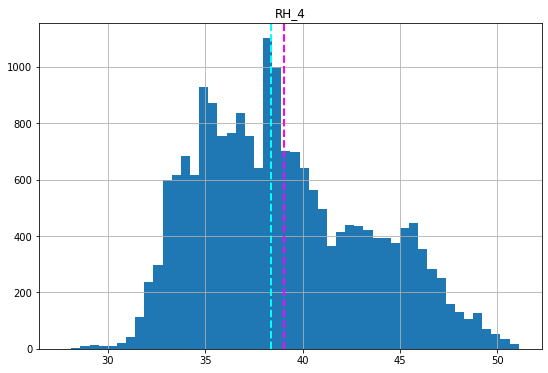

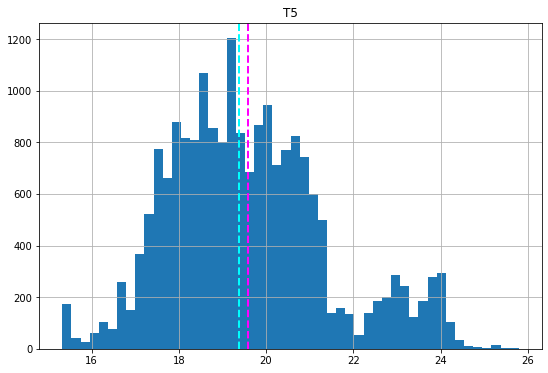

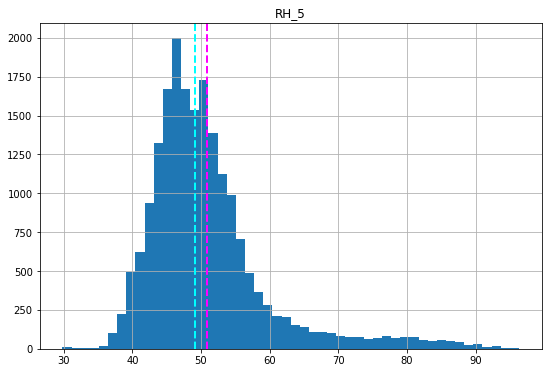

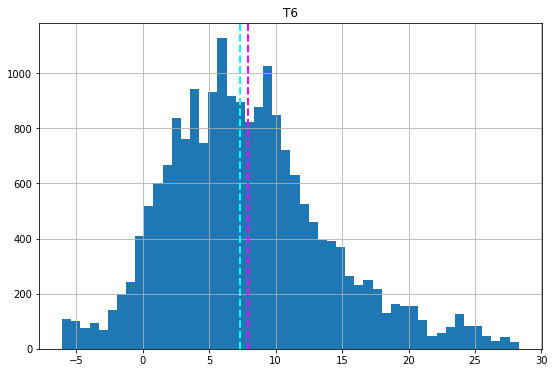

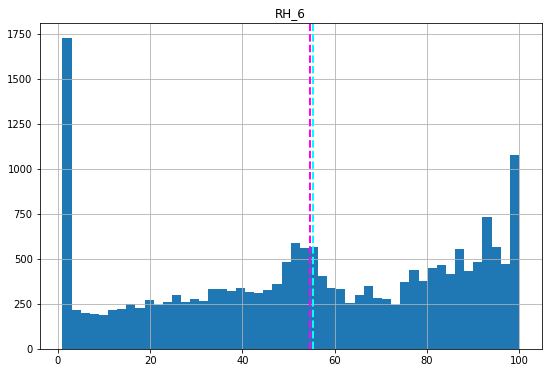

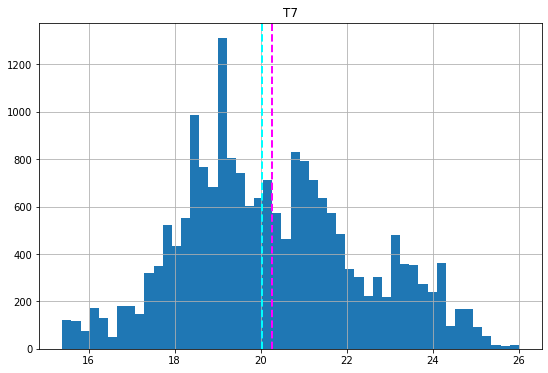

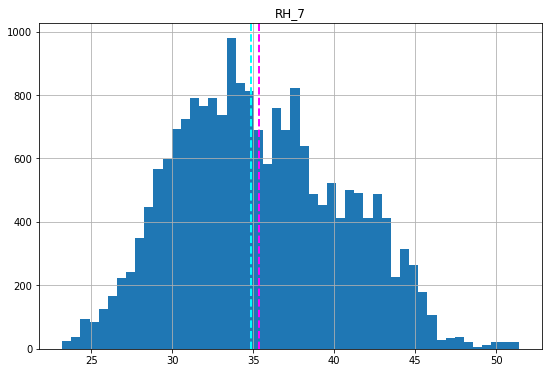

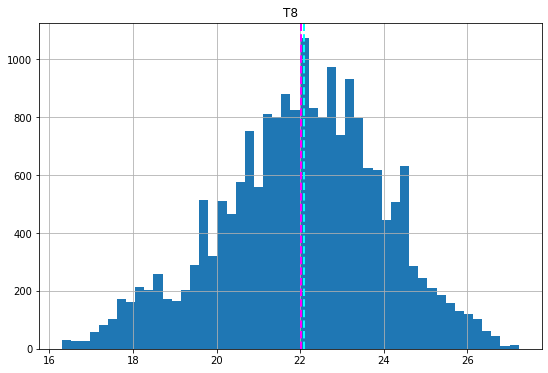

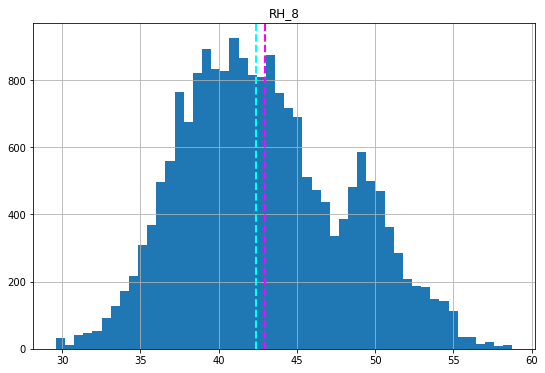

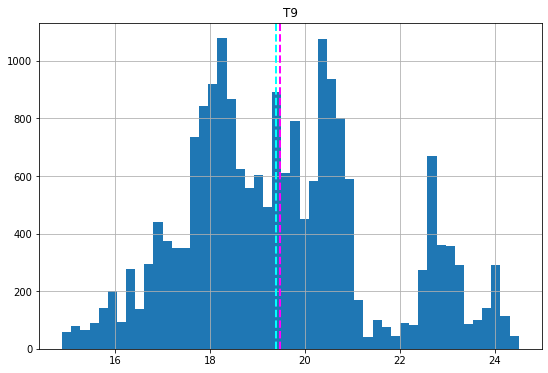

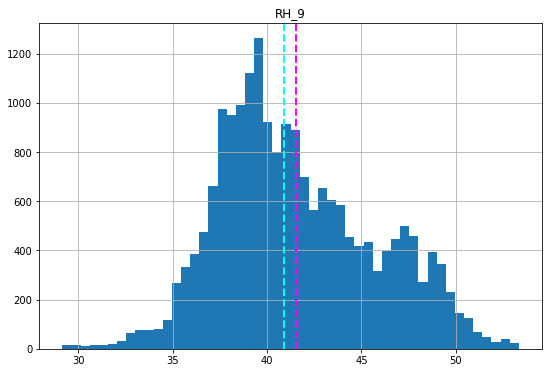

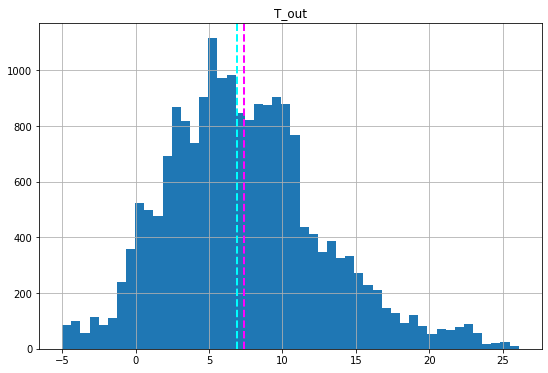

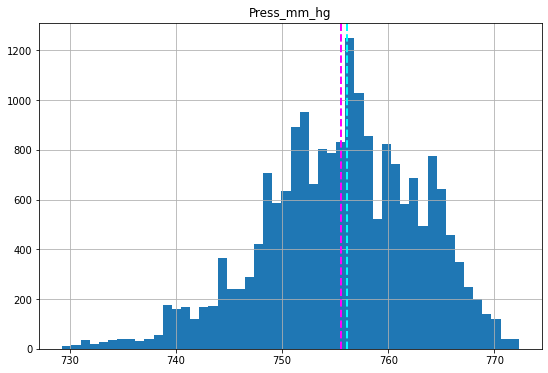

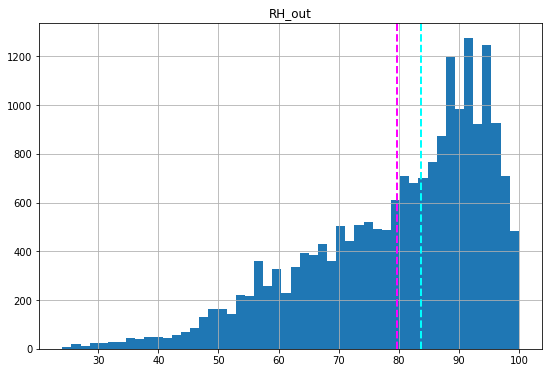

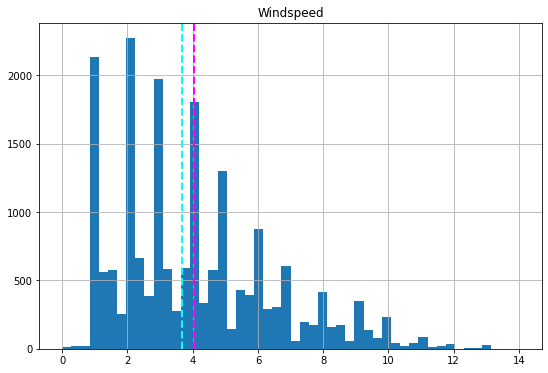

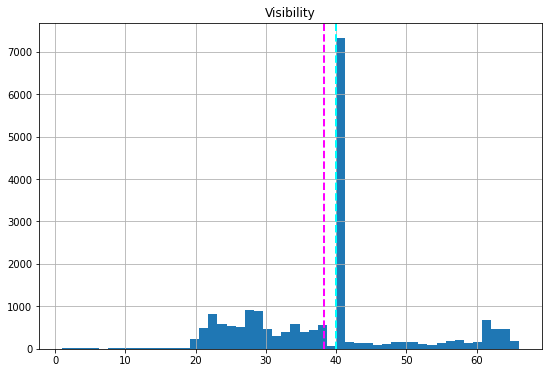

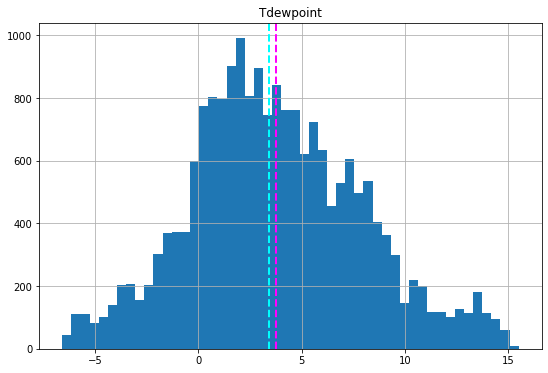

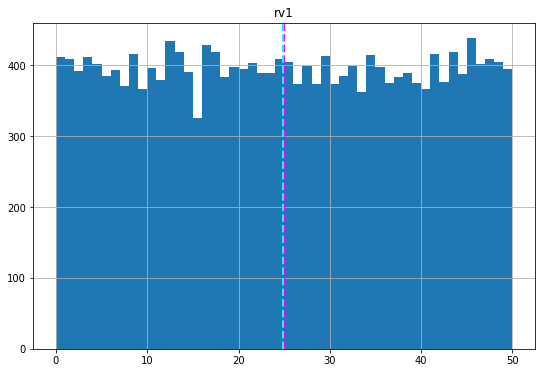

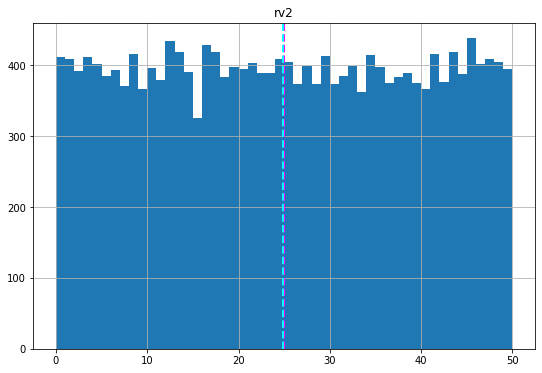

In [24]:

# plot a bar plot for each numerical feature count 

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

I pick this specific chart beacuse  histogram shows the frequency on the vertical axis and the horizontal axis is another dimension. Usually it has bins, where every bin has a minimum and maximum value. Each bin also has a frequency between x and infinite.Frequency shows clarity of the datasets.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

When we use a histogram in business, we will be able to improve your decision-making process since it will be easier to view the data graphically. 
A histogram allows you to display the frequency of occurrences of data within an interval.
When we use the data that is displayed in a histogram, we can regulate statistical information.


#### Chart - 2 ScatterPlot

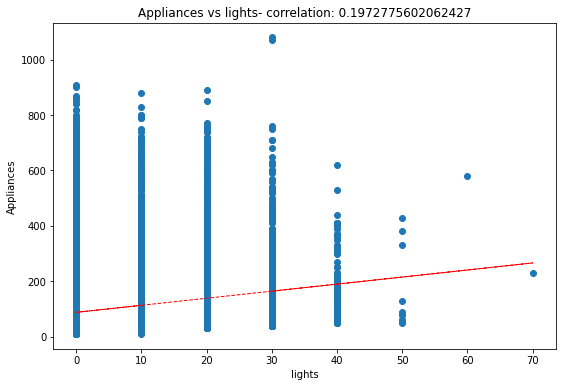

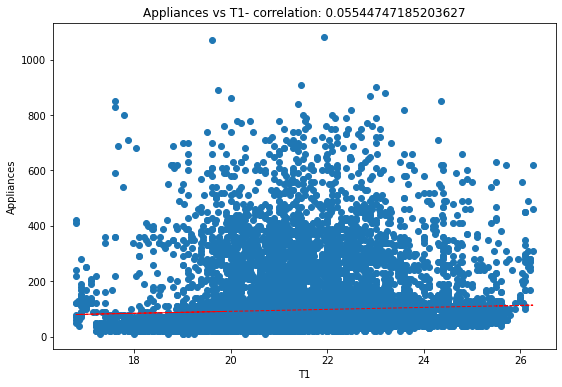

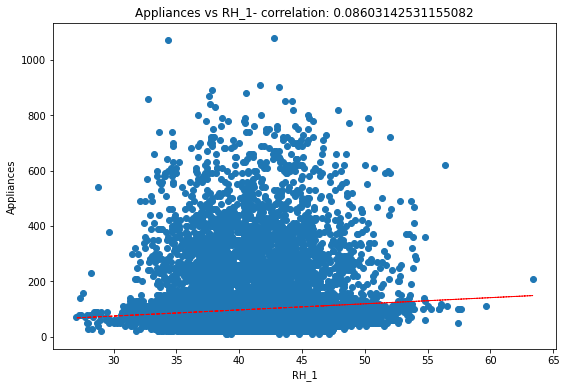

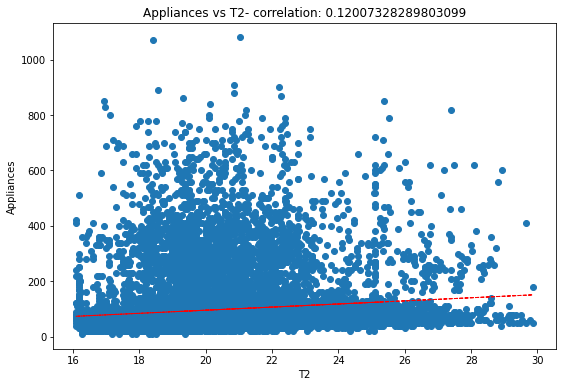

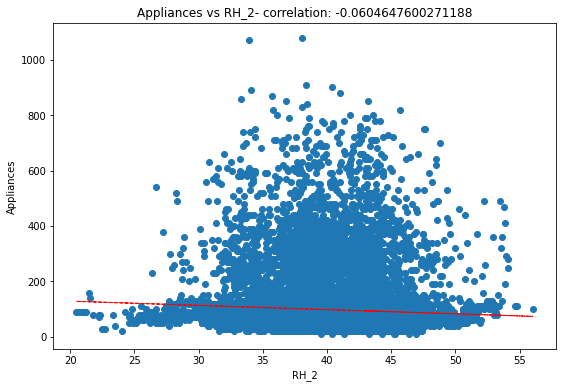

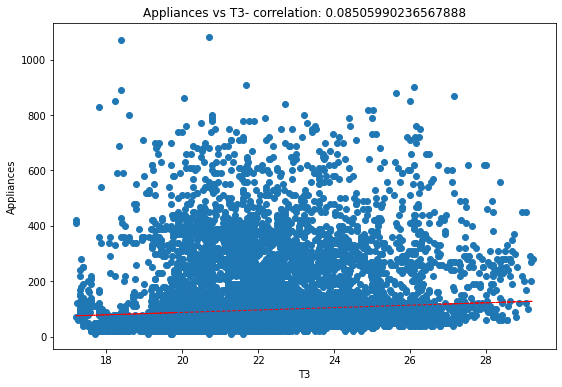

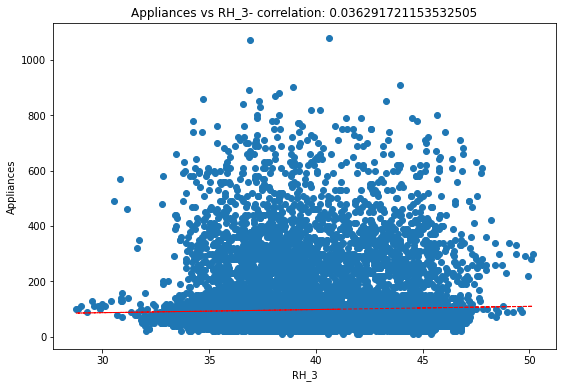

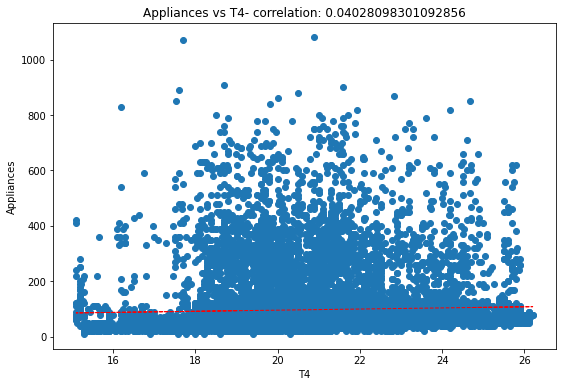

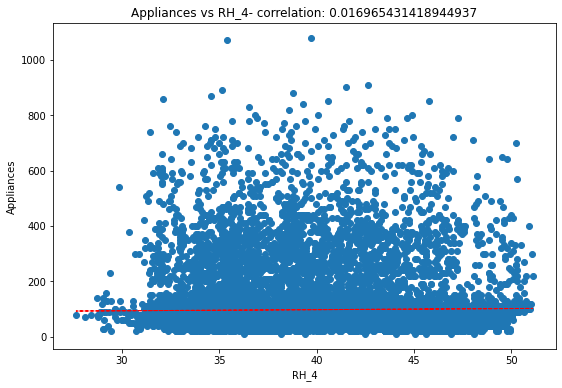

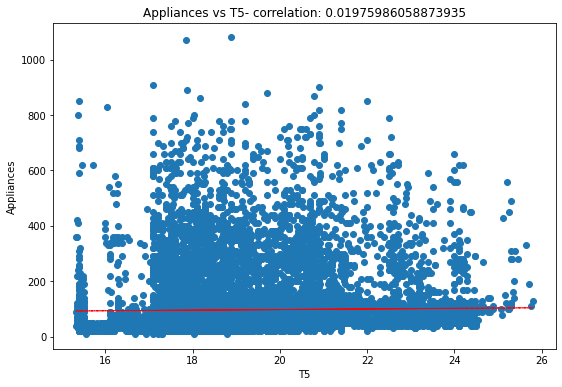

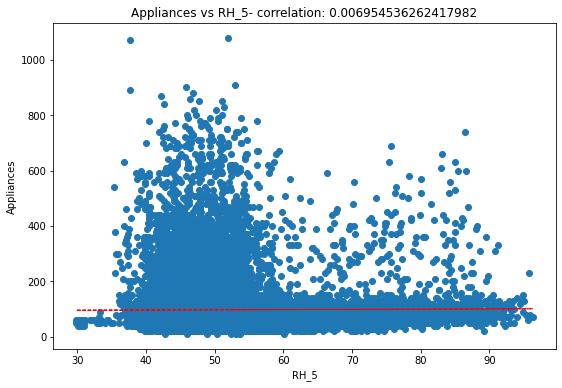

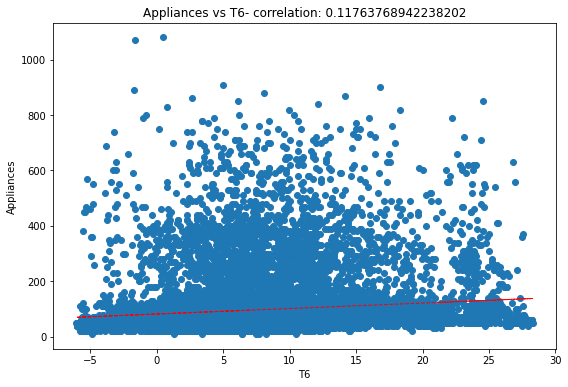

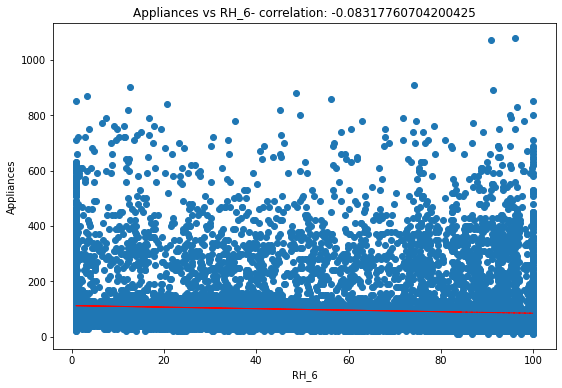

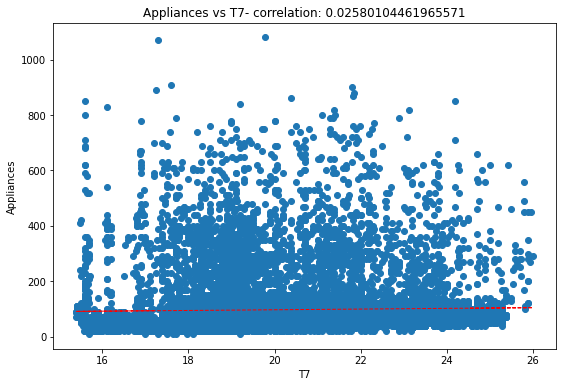

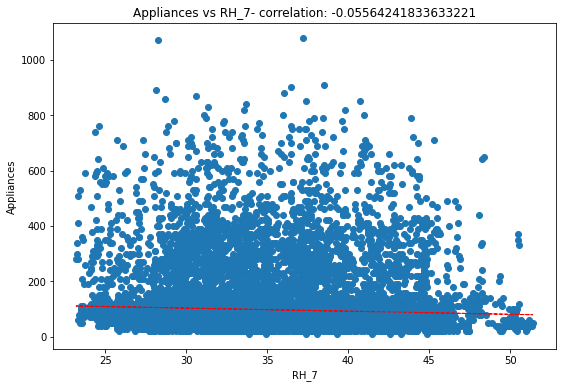

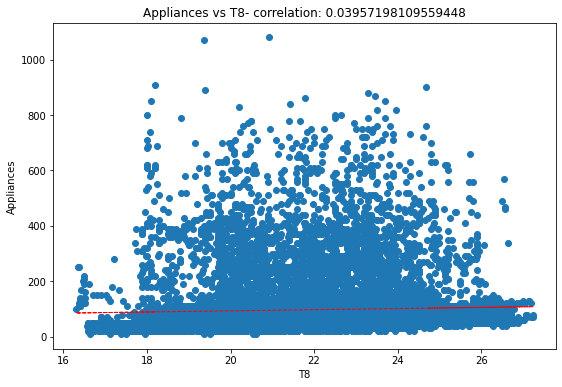

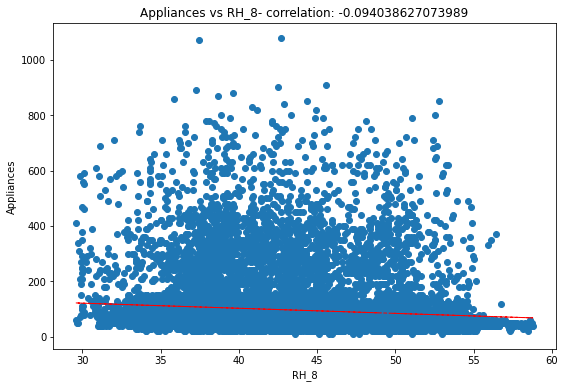

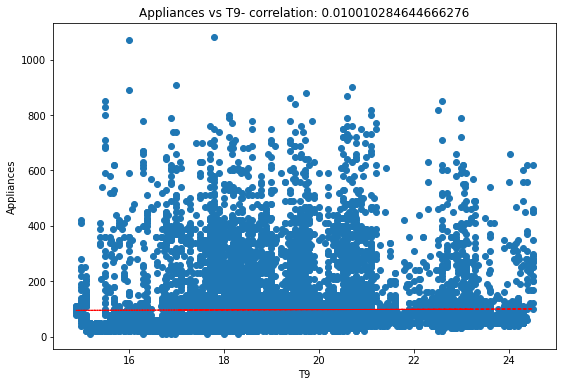

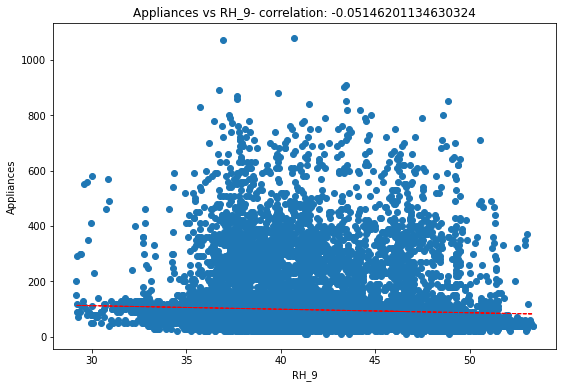

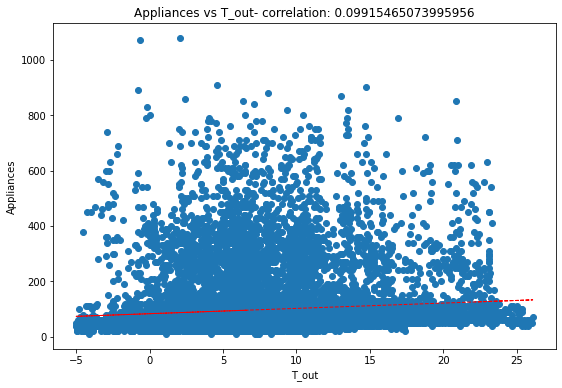

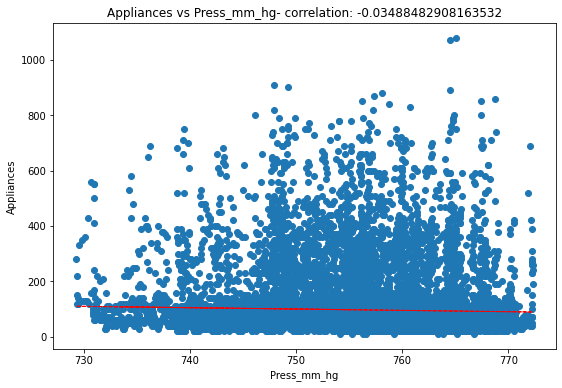

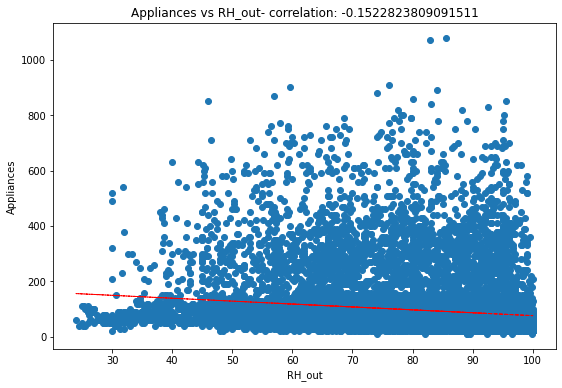

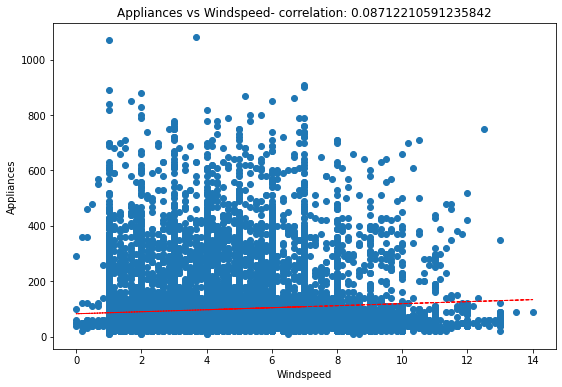

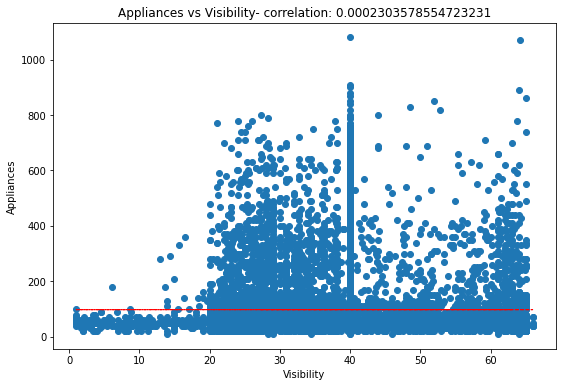

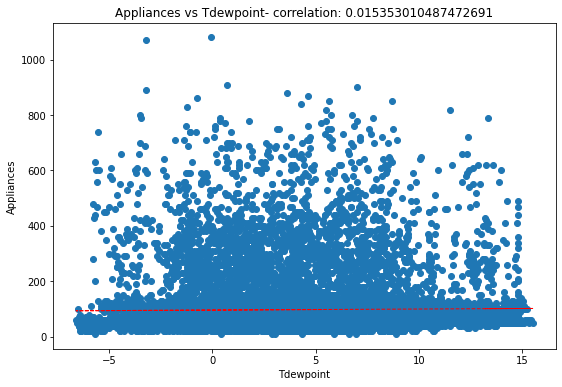

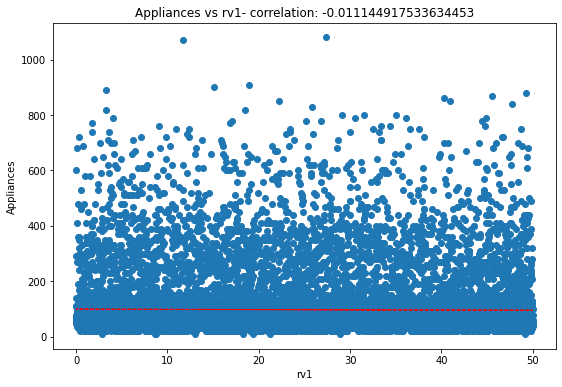

In [25]:
# Chart - 2 visualization code
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy[col]
    label = energy['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(energy[col], energy['Appliances'], 1)
    y_hat = np.poly1d(z)(energy[col])

    plt.plot(energy[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

 I pick this specific chart because the Scatter plots are the graphs that present the relationship between two variables in a data-set.As we see that there are various variables in our dataset.

##### 2. What is/are the insight(s) found from the chart?

A scatter plot is useful for understanding if two different data points may be related.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Aspect** -Scatter plots help you spot the correlation quickly. If the two variables have no effect on one another, the data points will just look like random dots around the graph.

#### Chart - 3
**CORRELATION MATRIX**


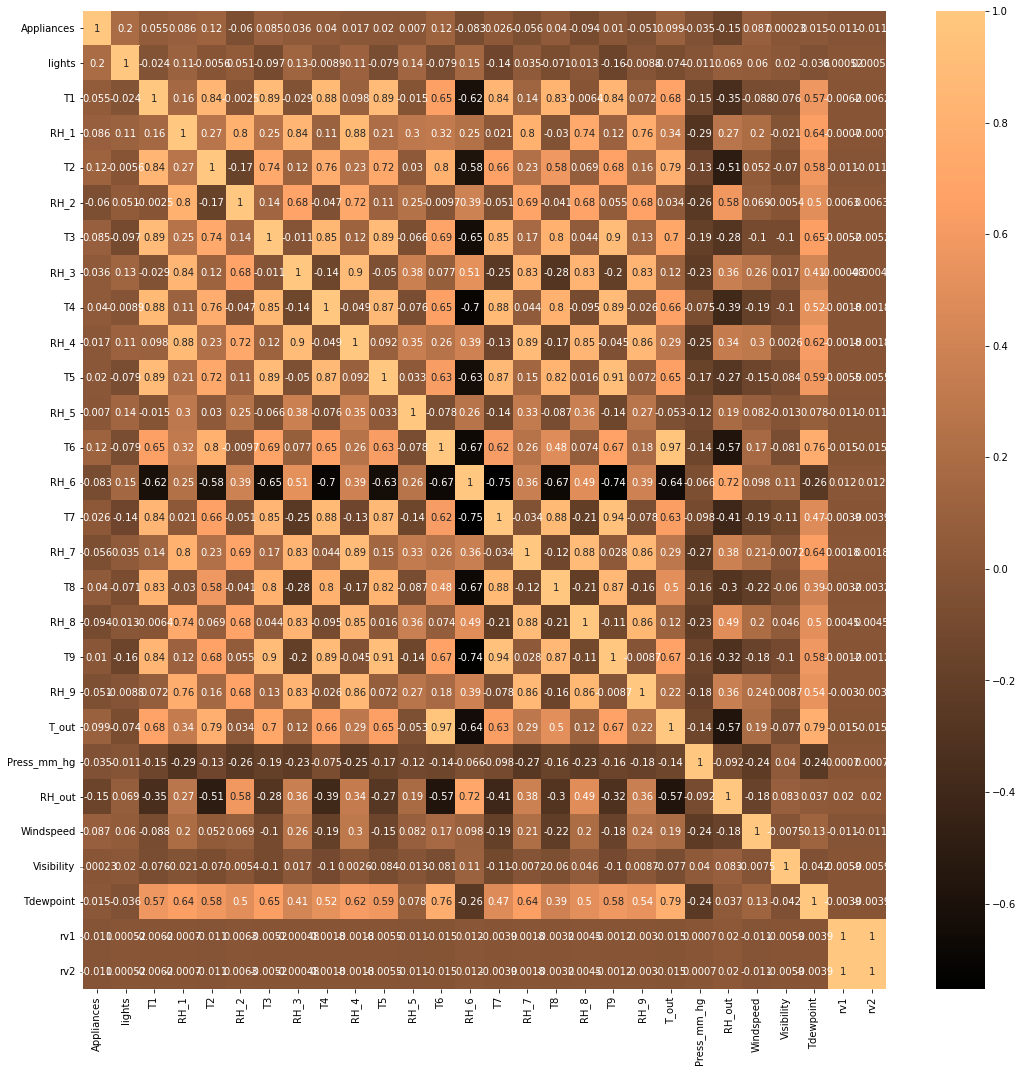

In [26]:
# Chart - 3 Heatmap
 ## Correlation
fig, ax = plt.subplots(1,1,figsize=(18,18))
sns.heatmap(energy.corr(),cmap='copper', ax=ax, annot=True)

In [27]:
energy[['T_out', 'RH_out']].corr()

,T_out,RH_out
T_out,1.000000,-0.574197
RH_out,-0.574197,1.000000


In [28]:
App_corr=[]
for i in energy.columns[1:]:
  
  App_corr.append([i,energy[['Appliances',i]].corr().iloc[1][0]])

App_corr=pd.DataFrame(App_corr,columns=['feature','correlation']).sort_values(['correlation'],ascending=False)
App_corr

,feature,correlation
0,Appliances,1.000000
1,lights,0.197278
4,T2,0.120073
12,T6,0.117638
20,T_out,0.099155
23,Windspeed,0.087122
3,RH_1,0.086031
6,T3,0.085060
2,T1,0.055447
8,T4,0.040281


##### 1. Why did you pick the specific chart?

 A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses that is why I prefer to used correlatix matrix for better understanding of data

##### 2. What is/are the insight(s) found from the chart?

**Observations based on correlation plot:--**

Temperature — All the temperature variables from T1-T9 and T_out have positive correlation with the target Appliances . For the indoor temperatures, the correlations are high as expected, since the ventilation is driven by the HRV unit and minimizes air tempera-ture differences between rooms. Four columns have a high degree of correlation with T9 — T3,T5,T7,T8 also T6 & T_Out has high correlation (both temperatures from outside) . Hence T6 & T9 can be removed from training set as information provided by them can be provided by other fields.

Weather attributes — Visibility, Tdewpoint, Press_mm_hg have low correlation values

Humidity — There are no significantly high correlation cases (> 0.9) for humidity sensors.

Random variables have no role to play
The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

A correlation matrix is a table which displays the correlation between variables. For example, it tells you whether a rise in fuel prices affects the rate of groceries. Once a relationship is ascertained, it helps businesses make business decisions accordingly

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Creating a copy of the dataset for further feature engineering
df=energy.copy()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


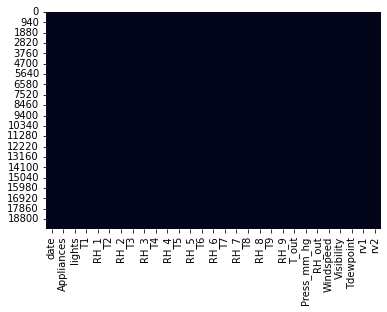

In [43]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

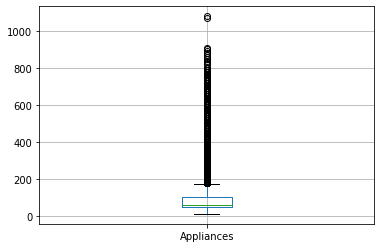

In [44]:
#lets check outlier for appliance
df.boxplot('Appliances')

Text(0, 0.5, 'Values')

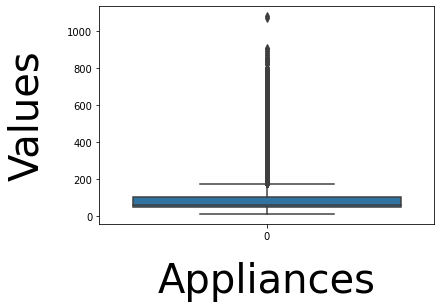

In [45]:
#lets represent the above using seaborn library
ax= sns.boxplot(data= df['Appliances'])
ax.set_xlabel('Appliances',fontsize=40, labelpad=20)
ax.set_ylabel('Values',fontsize=40, labelpad=20)

so this is the distribution of appliances in our dataset.

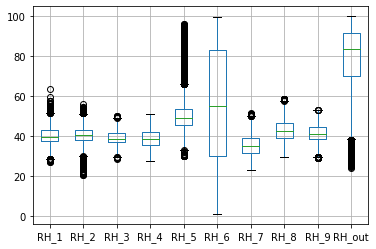

In [46]:
#outliers in relative humdity.
#lets plot the boxplot of relative humidity
df.boxplot(['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out'])

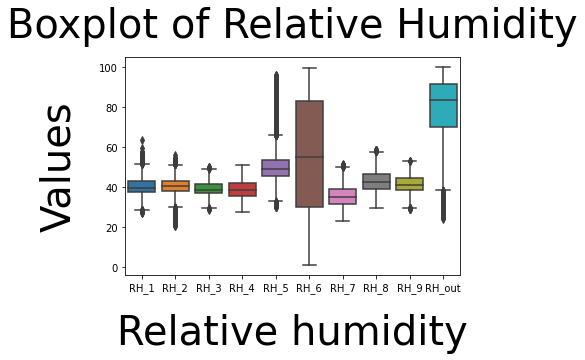

In [47]:
#lets check outliers in relative humidity
ax= sns.boxplot(data= df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']],orient='v')
ax.set_xlabel('Relative humidity',fontsize=40, labelpad=20)
ax.set_ylabel('Values',fontsize=40, labelpad=20)
ax.set_title("Boxplot of Relative Humidity", fontsize = 40,
            pad = 20)
sns.set(rc={'figure.figsize':(15,15)})

Since date column is only used for understanding the consumption and most of the values of light column is also zero therefore lets drop these two columns.

In [48]:
#lets drop light column
df= df.drop('lights', axis=1)
     

#lets check shape of data now 
df.shape

(19735, 28)

Light column was also removed as the are the reading of submeter and we are not focusing on appliance specific reading

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have use Box plot technique for outliers because Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

### 3. Categorical Encoding

In [49]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [50]:
# Expand Contraction

#### 2. Lower Casing

In [51]:
# Lower Casing

#### 3. Removing Punctuations

In [52]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [53]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [54]:
# Remove Stopwords

In [55]:
# Remove White spaces

#### 6. Rephrase Text

In [56]:
# Rephrase Text

#### 7. Tokenization

In [57]:
# Tokenization

#### 8. Text Normalization

In [58]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [59]:
# POS Taging

#### 10. Text Vectorization

In [60]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [62]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [63]:
# Transform Your data

### 6. Data Scaling

In [64]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [65]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [66]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [67]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 **Linear Regression Model**

In [68]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model


In [69]:
## Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [70]:
# Seperate dependent and independent variables 
feature_vars = df[col_temp + col_hum + col_weather + col_randoms] 
target_vars = df[col_target]


In [71]:
# I took a subpart of the data for analysis as it was giving memory error and was very slow for such large dataset
x= feature_vars.iloc[:1200,:]
y= target_vars.iloc[:1200,:]

scaler= StandardScaler()
x=scaler.fit_transform(x)

In [72]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0)

In [73]:
compiled= pd.DataFrame(columns= ['Regressor', 'Avg_Train_Score', 'Avg_Test_Score', 'RMSE_Best_Param', 'Best_Hyperparameters'])

In [74]:
#Linear Regression Model
lreg= LinearRegression()
lreg.fit(x_train, y_train)
print(f'Train score for Linear regression model without using Kfold validation is: {lreg.score(x_train, y_train)}')

train_scores= cross_val_score(lreg,x_train,y_train, cv=10)
print(f'Train score for Linear regression model using 10Fold cross validation is:  {train_scores.mean()}')
test_scores= cross_val_score(lreg,x_test,y_test, cv=10)
print(f'Test score for Linear regression model using 10Fold cross validation is:  {test_scores.mean()}')

Train score for Linear regression model without using Kfold validation is: 0.23037974417312734
Train score for Linear regression model using 10Fold cross validation is:  0.15775573814385285
Test score for Linear regression model using 10Fold cross validation is:  0.017950015930807084


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart

In [93]:
mse= cross_val_score(lreg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(f'RMSE for Linear regression model using 10Fold cross validation is: {mse.mean()}')

RMSE for Linear regression model using 10Fold cross validation is: -14436.575039795378


In [86]:
Linear=({'Regressor': 'LinearRegression', 'Avg_Train_Score': train_scores.mean(), 
                          'Avg_Test_Score': test_scores.mean(), 'RMSE_Best_Param': mse.mean(), 
                          'Best_Hyperparameters': "N/A"})

In [87]:
Linear

{'Regressor': 'LinearRegression',
 'Avg_Train_Score': 0.15775573814385285,
 'Avg_Test_Score': 0.017950015930807084,
 'RMSE_Best_Param': -14436.575039795378,
 'Best_Hyperparameters': 'N/A'}

In Linear Regression, hyperparameter is N/A.

#### 2. Cross- Validation & Hyperparameter Tuning

In [84]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

In [85]:
mse= cross_val_score(lreg, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
print(f'RMSE for Linear regression model using 10Fold cross validation is: {mse.mean()}')

RMSE for Linear regression model using 10Fold cross validation is: -14436.575039795378


##### Which hyperparameter optimization technique have you used and why?

In Linear Regression Model,Hyperparameter is NA

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

**IMPROVED LINEAR REGRESSION MODEL**

### ML Model - 2 **RIDGE MODEL**

In [88]:
ridge= Ridge()
param= {'alpha':[ 0.01, 0.1, 1, 5, 10,20,30,50]}
ridge_regressor= GridSearchCV(ridge, param, cv=10, return_train_score= True)
ridge_regressor.fit(x_train, y_train)
ridge_regressor.score(x_test, y_test)

0.2100492598234267

In [89]:
ridge_train_score_list= ridge_regressor.cv_results_["mean_train_score"]
print(f'Train score across different alpha is: {ridge_train_score_list}')

ridge_test_score_list= ridge_regressor.cv_results_["mean_test_score"]
print(f'\nTest score across different alpha is: {ridge_test_score_list}')

Train score across different alpha is: [0.23337142 0.23226206 0.22614691 0.21638262 0.20765262 0.19536235
 0.18657057 0.17413838]

Test score across different alpha is: [0.15807489 0.15873703 0.15576128 0.15039966 0.14514741 0.13775027
 0.13248132 0.12505314]


Best parameter for ridge regression is: {'alpha': 0.1}
Average training score for ridge regression model using 10Fold CV is: 0.20898586691093288
Average testing score for ridge regression model using 10Fold CV is: 0.14542562398058823


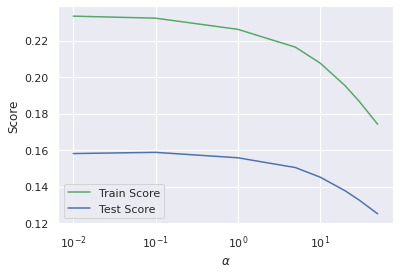

In [90]:
#visualize the result:plots
x_range= [0.01, 0.1, 1, 5, 10, 20, 30, 50]
plt.plot(x_range, ridge_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')

print(f'Best parameter for ridge regression is: {ridge_regressor.best_params_}')
print(f'Average training score for ridge regression model using 10Fold CV is: {((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for ridge regression model using 10Fold CV is: {((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')
      

In [91]:
#Implementing the final model with the best param with Root mean squared error(RMSE) as the scoring metrics
ridge_final= Ridge(alpha=0.1)
ridge_final.fit(x_train, y_train)
ridge_final_train_scores= cross_val_score(ridge_final,x_train, y_train, cv=10, scoring= 'neg_mean_squared_error')
ridge_final_test_scores= cross_val_score(ridge_final,x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Ridge regression model using 10 Fold CV is: {ridge_final_train_scores.mean()}')
print(f'Test  RMSE for best Ridge regression model using 10 Fold CV is: {ridge_final_test_scores.mean()}')

Train RMSE for best Ridge regression model using 10 Fold CV is: -14443.404929958564
Test  RMSE for best Ridge regression model using 10 Fold CV is: -17611.78812569864


In [92]:
ridge=({'Regressor': 'Ridge_Regression', 
                          'Avg_Train_Score': ((ridge_regressor.cv_results_["mean_train_score"]).sum())/len(x_range), 
                          'Avg_Test_Score': ((ridge_regressor.cv_results_["mean_test_score"]).sum())/len(x_range), 
                          'RMSE_Best_Param': ridge_final_test_scores.mean(),
                          'Best_Hyperparameters': ridge_regressor.best_params_})

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
ridge

Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization. In this technique, the cost function is altered by adding the penalty term to it. The amount of bias added to the model is called Ridge Regression penalty.

In this Evaluation metric Chart,Hyperparameter (alpha =0.1) and best Parameter is(-17611.78812569864)

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 **LASSO**

In [98]:
# ML Model - 3 
#Lasso regression
lasso= Lasso()
param= {'alpha':[0.0001, 0.001, 0.01, 0.1, 1,5]}
lasso_regressor= GridSearchCV(lasso, param, cv=10, return_train_score= True)
lasso_regressor.fit(x_train, y_train)
lasso_regressor.score(x_test, y_test)

0.20246962914770628

In [99]:
lasso_test_score_list= lasso_regressor.cv_results_["mean_test_score"]
print(f'Train score across different alpha is: {lasso_test_score_list}')

lasso_train_score_list= lasso_regressor.cv_results_["mean_train_score"]
print(f'\nTest score across different alpha is: {lasso_train_score_list}')

Train score across different alpha is: [0.15690019 0.15688675 0.15673856 0.15441212 0.12561511 0.07406097]

Test score across different alpha is: [0.2294974  0.22947087 0.2291935  0.22528906 0.18676666 0.1107756 ]


Best parameter for Lasso regression is: {'alpha': 0.0001}
Average training score for Lasso regression model using 10Fold CV is: 0.20183218124437055
Average testing score for Lasso regression model using 10Fold CV is: 0.1374356151629982


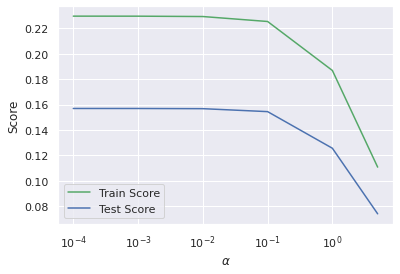

In [100]:
#visualize the result:plots
x_range= [0.0001, 0.001, 0.01, 0.1, 1,5]
plt.plot(x_range, lasso_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')


print(f'Best parameter for Lasso regression is: {lasso_regressor.best_params_}')
print(f'Average training score for Lasso regression model using 10Fold CV is: {((lasso_regressor.cv_results_["mean_train_score"]).sum())/len(x_range)}')
print(f'Average testing score for Lasso regression model using 10Fold CV is: {((lasso_regressor.cv_results_["mean_test_score"]).sum())/len(x_range)}')

In [101]:
#Implementing the final model with the best param with Root mean squared error(RMSE) as the scoring metrics
lasso_final= Lasso(alpha=0.1)
lasso_final.fit(x_train, y_train)
lasso_final_train_scores= cross_val_score(lasso_final,x_train, y_train, cv=10, scoring= 'neg_mean_squared_error')
lasso_final_test_scores= cross_val_score(lasso_final,x_test, y_test, cv=10, scoring= 'neg_mean_squared_error')
print(f'Train RMSE for best Lasso regression model using 10 Fold CV is: {lasso_final_train_scores.mean()}')
print(f'Test  RMSE for best Lasso regression model using 10 Fold CV is: {lasso_final_test_scores.mean()}')

Train RMSE for best Lasso regression model using 10 Fold CV is: -14544.985720895365
Test  RMSE for best Lasso regression model using 10 Fold CV is: -17797.82122416296


In [102]:
lasso=({'Regressor': 'Lasso_Regression',
                          'Avg_Train_Score': ((lasso_regressor.cv_results_["mean_train_score"]).sum())/len(x_range), 
                          'Avg_Test_Score': ((lasso_regressor.cv_results_["mean_test_score"]).sum())/len(x_range),
                          'RMSE_Best_Param': lasso_final_test_scores.mean(), 'Best_Hyperparameters': lasso_regressor.best_params_})

In [103]:
lasso

{'Regressor': 'Lasso_Regression',
 'Avg_Train_Score': 0.20183218124437055,
 'Avg_Test_Score': 0.1374356151629982,
 'RMSE_Best_Param': -17797.82122416296,
 'Best_Hyperparameters': {'alpha': 0.0001}}

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Lasso regression is also called Penalized regression method. This method is usually used in machine learning for the selection of the subset of variables. It provides greater prediction accuracy as compared to other regression models. Lasso Regularization helps to increase model interpretation.

#### 2. Cross- Validation & Hyperparameter Tuning

Train RMSE for best Lasso regression model using 10 Fold CV is: -14544.985720895365

Test  RMSE for best Lasso regression model using 10 Fold CV is: -17797.82122416296

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we have examined various concrete formulations with different Appliancess. We developed a graphs/charts that aligns to the available information. Utilizing model as a framework, we developed a fresh formulation and, being used to predicted the Appliances.

In histogram charts, 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh , there will be outliers in this column and there are small number of cases where consumption is very high.

The Insights from bar chart analysis for weedays ,the consumption is higher on weekends , ie week number 0, 6, 5

For hour analysis ,the consumption is high in the evening time , ie hour between 16 and 20

For ML analysis , I use the linear regression ,ridge regression  for analysis part.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***